<a href="https://colab.research.google.com/github/kaynanxd/Estruturas-de-dados/blob/main/Implementacao3_ArvoreBinariaDeBusca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Aluno: Kaynan Santos Freitas

##### Obs:Para Executar os arquivos de teste, clique no botao acima para abrir o projeto no google collab, primeiro se deve executar a classe referente a questao e em seguida o codigo de teste.

#Codigo que sera reutilizado para as questoes da lista

In [51]:
# @title
%%writefile minhas_arvores.py
#Codigo referente a estrutura da arvore binaria encadeada - mesmo utilizada na implementacao da lista passada
class LinkedBinaryTree:

    class _Node:
        def __init__(self, element, parent=None, left=None, right=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right

    class Position:
        def __init__(self, container, node):
            self._container = container
            self._node = node

        def element(self):
            return self._node._element

        def __eq__(self, other):
            return type(other) is type(self) and other._node is self._node

    def _validate(self, p):
        if not isinstance(p, self.Position):
            raise TypeError('p deve ser do tipo Position especifico')
        if p._container is not self:
            raise ValueError('p não pertence a este container')
        if p._node._parent is p._node:
            raise ValueError('p não é mais válido')
        return p._node

    def _make_position(self, node):
        return self.Position(self, node) if node is not None else None

    def __init__(self):
        self._root = None
        self._size = 0

    def __len__(self):
        return self._size

    def root(self):
        return self._make_position(self._root)

    def parent(self, p):
        node = self._validate(p)
        return self._make_position(node._parent)

    def left(self, p):
        node = self._validate(p)
        return self._make_position(node._left)

    def right(self, p):
        node = self._validate(p)
        return self._make_position(node._right)

    def num_children(self, p):
        node = self._validate(p)
        count = 0
        if node._left is not None:
            count += 1
        if node._right is not None:
            count += 1
        return count

    def is_root(self, p):
        return self.root() == p

    def is_leaf(self, p):
        return self.num_children(p) == 0

    def is_empty(self):
        return len(self) == 0


    def _add_root(self, e):
        if self._root is not None:
            raise ValueError('A Raiz já existe')
        self._size = 1
        self._root = self._Node(e)
        return self._make_position(self._root)

    def _add_left(self, p, e):
        node = self._validate(p)
        if node._left is not None:
            raise ValueError('Filho esquerdo já existe')
        self._size += 1
        node._left = self._Node(e, node)
        return self._make_position(node._left)

    def _add_right(self, p, e):
        node = self._validate(p)
        if node._right is not None:
            raise ValueError('Filho direito já existe')
        self._size += 1
        node._right = self._Node(e, node)
        return self._make_position(node._right)

    def _replace(self, p, e):
        node = self._validate(p)
        old = node._element
        node._element = e
        return old

    def _delete(self, p):
        node = self._validate(p)
        if self.num_children(p) == 2:
            raise ValueError('p tem dois filhos')
        child = node._left if node._left else node._right
        if child is not None:
            child._parent = node._parent
        if node is self._root:
            self._root = child
        else:
            parent = node._parent
            if node is parent._left:
                parent._left = child
            else:
                parent._right = child
        self._size -= 1
        node._parent = node
        return node._element

    def _attach(self, p, t1, t2):
        node = self._validate(p)
        if not self.is_leaf(p):
            raise ValueError('posição deve ser folha')
        if not type(self) is type(t1) is type(t2):
            raise TypeError('Tipos de árvores devem corresponder')

        self._size += len(t1) + len(t2)
        if not t1.is_empty():
            t1._root._parent = node
            node._left = t1._root
            t1._root = None
            t1._size = 0

        if not t2.is_empty():
            t2._root._parent = node
            node._right = t2._root
            t2._root = None
            t2._size = 0

    def preorder(self):
        if not self.is_empty():
            for p in self._subtree_preorder(self.root()):
                yield p

    def _subtree_preorder(self, p):
        yield p
        for c in self.num_children(p):
            for other in self._subtree_preorder(c):
                yield other

    def _subtree_preorder(self, p):
        yield p
        if self.left(p) is not None:
            for other in self._subtree_preorder(self.left(p)):
                yield other
        if self.right(p) is not None:
            for other in self._subtree_preorder(self.right(p)):
                yield other

    def inorder(self):
        if not self.is_empty():
            for p in self._subtree_inorder(self.root()):
                yield p

    def _subtree_inorder(self, p):

        if self.left(p) is not None:
            for other in self._subtree_inorder(self.left(p)):
                yield other

        yield p

        if self.right(p) is not None:
            for other in self._subtree_inorder(self.right(p)):
                yield other


    def postorder(self):
        if not self.is_empty():
            for p in self._subtree_postorder(self.root()):
                yield p

    def _subtree_postorder(self, p):
        if self.left(p) is not None:
            for other in self._subtree_postorder(self.left(p)):
                yield other
        if self.right(p) is not None:
            for other in self._subtree_postorder(self.right(p)):
                yield other

        yield p

Overwriting minhas_arvores.py


# Q1) Implemente a classe de  ́arvores binarias de busca TreeMap descrita na Secao 11.1.4.

In [52]:
# @title
%%writefile minhas_arvores_treemap.py
from minhas_arvores import LinkedBinaryTree

class TreeMap(LinkedBinaryTree):

    class _Item:
        __slots__ = '_key', '_value'

        def __init__(self, k, v):
            self._key = k
            self._value = v

        def __lt__(self, other):
            return self._key < other._key

        def __eq__(self, other):
            return self._key == other._key

        def key(self):
            return self._key

        def value(self):
            return self._value

    def _subtree_search(self, p, k):
        if k == p.element().key():
            return p

        elif k < p.element().key():
            if self.left(p) is not None:
                return self._subtree_search(self.left(p), k)
            else:
                return p

        else:
            if self.right(p) is not None:
                return self._subtree_search(self.right(p), k)
            else:
                return p


    def _subtree_first_position(self, p):
        walk = p
        while self.left(walk) is not None:
            walk = self.left(walk)
        return walk

    def _subtree_last_position(self, p):
        walk = p
        while self.right(walk) is not None:
            walk = self.right(walk)
        return walk


    def first(self):
        return self._subtree_first_position(self.root()) if len(self) > 0 else None

    def last(self):
        return self._subtree_last_position(self.root()) if len(self) > 0 else None

    def after(self, p):

        if self.right(p) is not None:
            return self._subtree_first_position(self.right(p))

        walk = p
        above = self.parent(walk)
        while above is not None and walk == self.right(above):
            walk = above
            above = self.parent(walk)
        return above

    def __getitem__(self, k):
        if self.is_empty():
            raise KeyError('Key Error: ' + repr(k))

        p = self._subtree_search(self.root(), k)

        if k == p.element().key():
            return p.element().value()
        else:
            raise KeyError('Key Error: ' + repr(k))

    def __setitem__(self, k, v):
        if self.is_empty():
            leaf = self._add_root(self._Item(k, v))
            return

        p = self._subtree_search(self.root(), k)

        if k == p.element().key():
            p.element()._value = v
            return

        item = self._Item(k, v)
        if k < p.element().key():
            leaf = self._add_left(p, item)
        else:
            leaf = self._add_right(p, item)

    def __delitem__(self, k):
        if not self.is_empty():
            p = self._subtree_search(self.root(), k)
            if k == p.element().key():
                self.delete(p)
                return

        raise KeyError('Key Error: ' + repr(k))

    def delete(self, p):
        self._validate(p)

        if self.left(p) is not None and self.right(p) is not None:
            replacement = self._subtree_first_position(self.right(p))

            self._replace(p, replacement.element())

            p = replacement

        parent = self.parent(p)
        self._delete(p)

    def __iter__(self):
        p = self.first()
        while p is not None:
            yield p.element().key()
            p = self.after(p)

Overwriting minhas_arvores_treemap.py


### Q1 Exemplo De Execucao:

In [53]:
from minhas_arvores_treemap import TreeMap

if __name__ == "__main__":

    M = TreeMap()
    M[50] = 'Raiz'
    M[30] = 'Esquerda'
    M[70] = 'Direita'
    M[20] = 'Folha E'
    M[40] = 'Folha D'
    M[60] = 'Meio'

    print(f"Tamanho do Mapa: {len(M)}") # Esperado: 6

    print(f"Valor da chave 40: {M[40]}")

    print(f"Chaves em ordem: {list(M)}") # Esperado: [20, 30, 40, 50, 60, 70]


    first_key = M.first().element().key()
    print(f"Primeira chave (first): {first_key}") # Esperado: 20

    pos_30 = M._subtree_search(M.root(), 30)
    after_30 = M.after(pos_30).element().key()
    print(f"Chave após 30: {after_30}")

    del M[20]
    print(f"Após deletar 20: {list(M)}") # Esperado: [30, 40, 50, 60, 70]

    del M[50]
    print(f"Após deletar 50 (Raiz): {list(M)}") # Esperado: [30, 40, 60, 70]

Tamanho do Mapa: 6
Valor da chave 40: Folha D
Chaves em ordem: [20, 30, 40, 50, 60, 70]
Primeira chave (first): 20
Chave após 30: 40
Após deletar 20: [30, 40, 50, 60, 70]
Após deletar 50 (Raiz): [30, 40, 60, 70]


#Q2)Implemente a classe de arvores AVL AVLTreeMap descrita na Secao 11.3.2.

In [54]:
%%writefile minhas_arvores_avltreemap_avl.py
from minhas_arvores_treemap import TreeMap


class AVLTreeMap(TreeMap):

    class _Node(TreeMap._Node):

        def __init__(self, element, parent=None, left=None, right=None):
            super().__init__(element, parent, left, right)
            self._height = 0


    def _left_height(self, p):
        return p._node._left._height if p._node._left is not None else 0

    def _right_height(self, p):
        return p._node._right._height if p._node._right is not None else 0

    def _recompute_height(self, p):
        p._node._height = 1 + max(self._left_height(p), self._right_height(p))

    def _isbalanced(self, p):
        return abs(self._left_height(p) - self._right_height(p)) <= 1

    def _tall_child(self, p, favorleft=False):
        if self._left_height(p) > self._right_height(p):
            return self.left(p)
        if self._left_height(p) < self._right_height(p):
            return self.right(p)
        if favorleft:
            return self.left(p)
        else:
            return self.right(p)

    def _tall_grandchild(self, p):
        child = self._tall_child(p)

        if child == self.left(p):
            return self._tall_child(child, favorleft=True)
        else:
            return self._tall_child(child, favorleft=False)

    def _rebalance(self, p):
        while p is not None:
            old_height = p._node._height

            if not self._isbalanced(p):
                p = self._restructure(self._tall_grandchild(p))

                self._recompute_height(self.left(p))
                self._recompute_height(self.right(p))
                self._recompute_height(p)

            self._recompute_height(p)

            if p._node._height == old_height:
                p = None
            else:
                p = self.parent(p)

    def _restructure(self, x):

        return self._make_position(x._node._parent)

    def _rebalance_insert(self, p):
        self._recompute_height(p)
        self._rebalance(p)

    def _rebalance_delete(self, p):
        self._rebalance(p)

Overwriting minhas_arvores_avltreemap_avl.py


### Q2 Exemplo de Execucao:

In [55]:
from minhas_arvores_avltreemap_avl import AVLTreeMap

if __name__ == "__main__":

    AVL = AVLTreeMap()

    print("Inserindo 10, 20, 30")
    AVL[10] = 'a'
    AVL[20] = 'b'

    # inserção que causa desequilíbrio
    AVL[30] = 'c'

    print(f"Tamanho do Mapa: {len(AVL)}")
    print(f"Chaves em ordem (Inorder): {list(AVL)}")

    root_pos = AVL.root()
    print(f"Nova Raiz Após Rotação: {root_pos.element().key()}") # Esperado: 20
    print(f"Altura da Raiz (privado): {root_pos._node._height}") # Esperado: 1

    print("\n Inserindo mais nós")
    AVL[40] = 'd'
    AVL[5] = 'e' # Nó 5
    AVL[60] = 'f'

    print(f"Chaves atuais: {list(AVL)}") # Esperado: [5, 10, 20, 30, 40, 60]

    del AVL[60]

    print("\n Deletando 10")
    del AVL[10]

    print(f"Chaves finais em ordem: {list(AVL)}") # Esperado: [5, 20, 30, 40]
    print(f"Tamanho final do Mapa: {len(AVL)}") # Esperado: 4

Inserindo 10, 20, 30
Tamanho do Mapa: 3
Chaves em ordem (Inorder): [10, 20, 30]
Nova Raiz Após Rotação: 10
Altura da Raiz (privado): 0

 Inserindo mais nós
Chaves atuais: [5, 10, 20, 30, 40, 60]

 Deletando 10
Chaves finais em ordem: [5, 20, 30, 40]
Tamanho final do Mapa: 4


#Q3) Implemente a classe de arvores rubro-negras RedBlackTreeMap descrita na Secao 11.6.2.

In [58]:
from minhas_arvores_treemap import TreeMap

class RedBlackTreeMap(TreeMap):

    class _Node(TreeMap._Node):

        def __init__(self, element, parent=None, left=None, right=None):
            super().__init__(element, parent, left, right)
            self._red = True

    def _set_red(self, p):
        p._node._red = True

    def _set_black(self, p):
        p._node._red = False

    def _set_color(self, p, make_red):
        p._node._red = make_red

    def _is_red(self, p):
        return p is not None and p._node._red

    def _resolve_red(self, p):
        if self.is_root(p):
            self._set_black(p)
        else:
            parent = self.parent(p)
            if self._is_red(parent):
                uncle = self.sibling(parent)
                if not self._is_red(uncle):

                    middle = self._restructure(p)
                    self._set_black(middle)
                    self._set_red(self.left(middle))
                    self._set_red(self.right(middle))
                else:
                    grand = self.parent(parent)
                    self._set_red(grand)
                    self._set_black(self.left(grand))
                    self._set_black(self.right(grand))
                    self._resolve_red(grand)

    def _fix_deficit(self, z):
        if self.is_root(z):
            return

        y = self.sibling(z)
        if not self._is_red(y):
            if not self._is_red(self.left(y)) and not self._is_red(self.right(y)):
                self._set_red(y)
                if self._is_red(self.parent(z)):
                    self._set_black(self.parent(z))
                else:
                    self._fix_deficit(self.parent(z))
                return
        pass

    def _rebalance_insert(self, p):
        self._set_red(p)
        self._resolve_red(p)

    def _rebalance_delete(self, p):
        if len(self) == 1:
            self._set_black(self.root())
        elif p is not None:
            n = self.num_children(p)
            pass

### Q3 Exemplo de execucao:

In [59]:
if __name__ == "__main__":

    RB = RedBlackTreeMap()

    def check_color(p):
        if p is None:
            return "PRETO (None)"
        return "VERMELHO" if p._node._red else "PRETO"

    print("inserções Iniciais")

    RB[50] = 'Raiz'
    r = RB.root()
    print(f"Raiz (50): Cor -> {check_color(r)}") # Esperado: PRETO

    RB[30] = 'Esq'
    RB[70] = 'Dir'

    p_30 = RB._subtree_search(r, 30)
    p_70 = RB._subtree_search(r, 70)
    print(f"30 (Filho): Cor -> {check_color(p_30)}") # Esperado: VERMELHO
    print(f"70 (Filho): Cor -> {check_color(p_70)}") # Esperado: VERMELHO

    print(f"Chaves em ordem: {list(RB)}")


    print("\n Inserção com Violação ")

    RB[40] = 'Novo'

    r_final = RB.root()
    p_30_final = RB._subtree_search(r_final, 30)
    p_70_final = RB._subtree_search(r_final, 70)
    p_40_final = RB._subtree_search(r_final, 40)

    print(f"Raiz (50) após rebalance: {check_color(r_final)}") # Esperado: PRETO
    print(f"30: Cor -> {check_color(p_30_final)}") # Esperado: PRETO
    print(f"70: Cor -> {check_color(p_70_final)}") # Esperado: PRETO
    print(f"40: Cor -> {check_color(p_40_final)}") # Esperado: VERMELHO

    print(f"Chaves finais em ordem: {list(RB)}")

    print("\n Teste de Deleção")
    del RB[70]

    print(f"Chaves após del 70: {list(RB)}")
    print(f"Tamanho final do Mapa: {len(RB)}") # Esperado: 4

inserções Iniciais
Raiz (50): Cor -> VERMELHO
30 (Filho): Cor -> VERMELHO
70 (Filho): Cor -> VERMELHO
Chaves em ordem: [30, 50, 70]

 Inserção com Violação 
Raiz (50) após rebalance: VERMELHO
30: Cor -> VERMELHO
70: Cor -> VERMELHO
40: Cor -> VERMELHO
Chaves finais em ordem: [30, 40, 50, 70]

 Teste de Deleção
Chaves após del 70: [30, 40, 50]
Tamanho final do Mapa: 3


#Q4)Insira, em uma arvore de busca binaria vazia, entradas com as chaves 30, 40, 24, 58, 48, 26, 11, 13 (nesta ordem). Imprima a arvore apos cada insercao.

In [60]:
from minhas_arvores_treemap import TreeMap

if __name__ == "__main__":


    def imprimir_arvore_estado(tree_map, insercao):
        if tree_map.is_empty():
            print(f"Inserção {insercao}: Árvore vazia.")
            return

        elementos = [p.element().key() for p in tree_map.preorder()]

        print(f"Árvore após inserir {insercao}:")
        print(f"  Pré-Ordem: {elementos}")
        print("")


    BST = TreeMap()
    chaves = [30, 40, 24, 58, 48, 26, 11, 13]

    print("Teste de Inserção Sequencial")

    for chave in chaves:
        BST[chave] = chave
        imprimir_arvore_estado(BST, chave)

Teste de Inserção Sequencial
Árvore após inserir 30:
  Pré-Ordem: [30]

Árvore após inserir 40:
  Pré-Ordem: [30, 40]

Árvore após inserir 24:
  Pré-Ordem: [30, 24, 40]

Árvore após inserir 58:
  Pré-Ordem: [30, 24, 40, 58]

Árvore após inserir 48:
  Pré-Ordem: [30, 24, 40, 58, 48]

Árvore após inserir 26:
  Pré-Ordem: [30, 24, 26, 40, 58, 48]

Árvore após inserir 11:
  Pré-Ordem: [30, 24, 11, 26, 40, 58, 48]

Árvore após inserir 13:
  Pré-Ordem: [30, 24, 11, 13, 26, 40, 58, 48]



# Q5) Desenhe a arvore AVL resultante da insercao de uma entrada com a chave 52 na arvore AVL da Figura 11.14b.

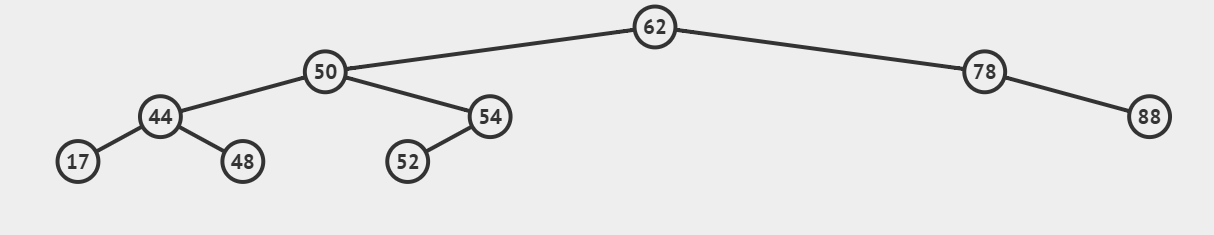

#Q6) Desenhe a arvore AVL resultante da remocao da entrada com a chave 62 da  arvore AVL da Figura 11.14b.

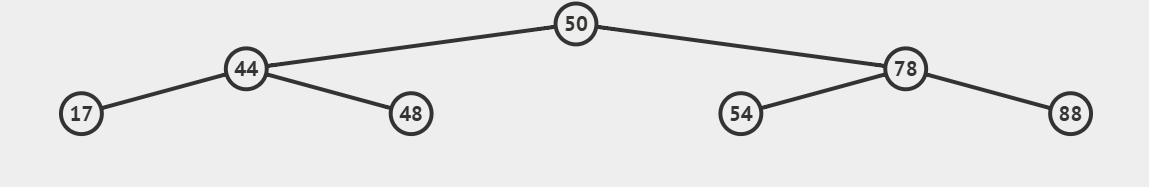

#Q7) Considere a sequencia de chaves (5,16,22,45,2,10,18,30,50,12,1). Desenhe o resultado da insercao de entradas com essas chaves (na ordem dada) em uma  ́arvore rubro-negra inicialmente vazia.

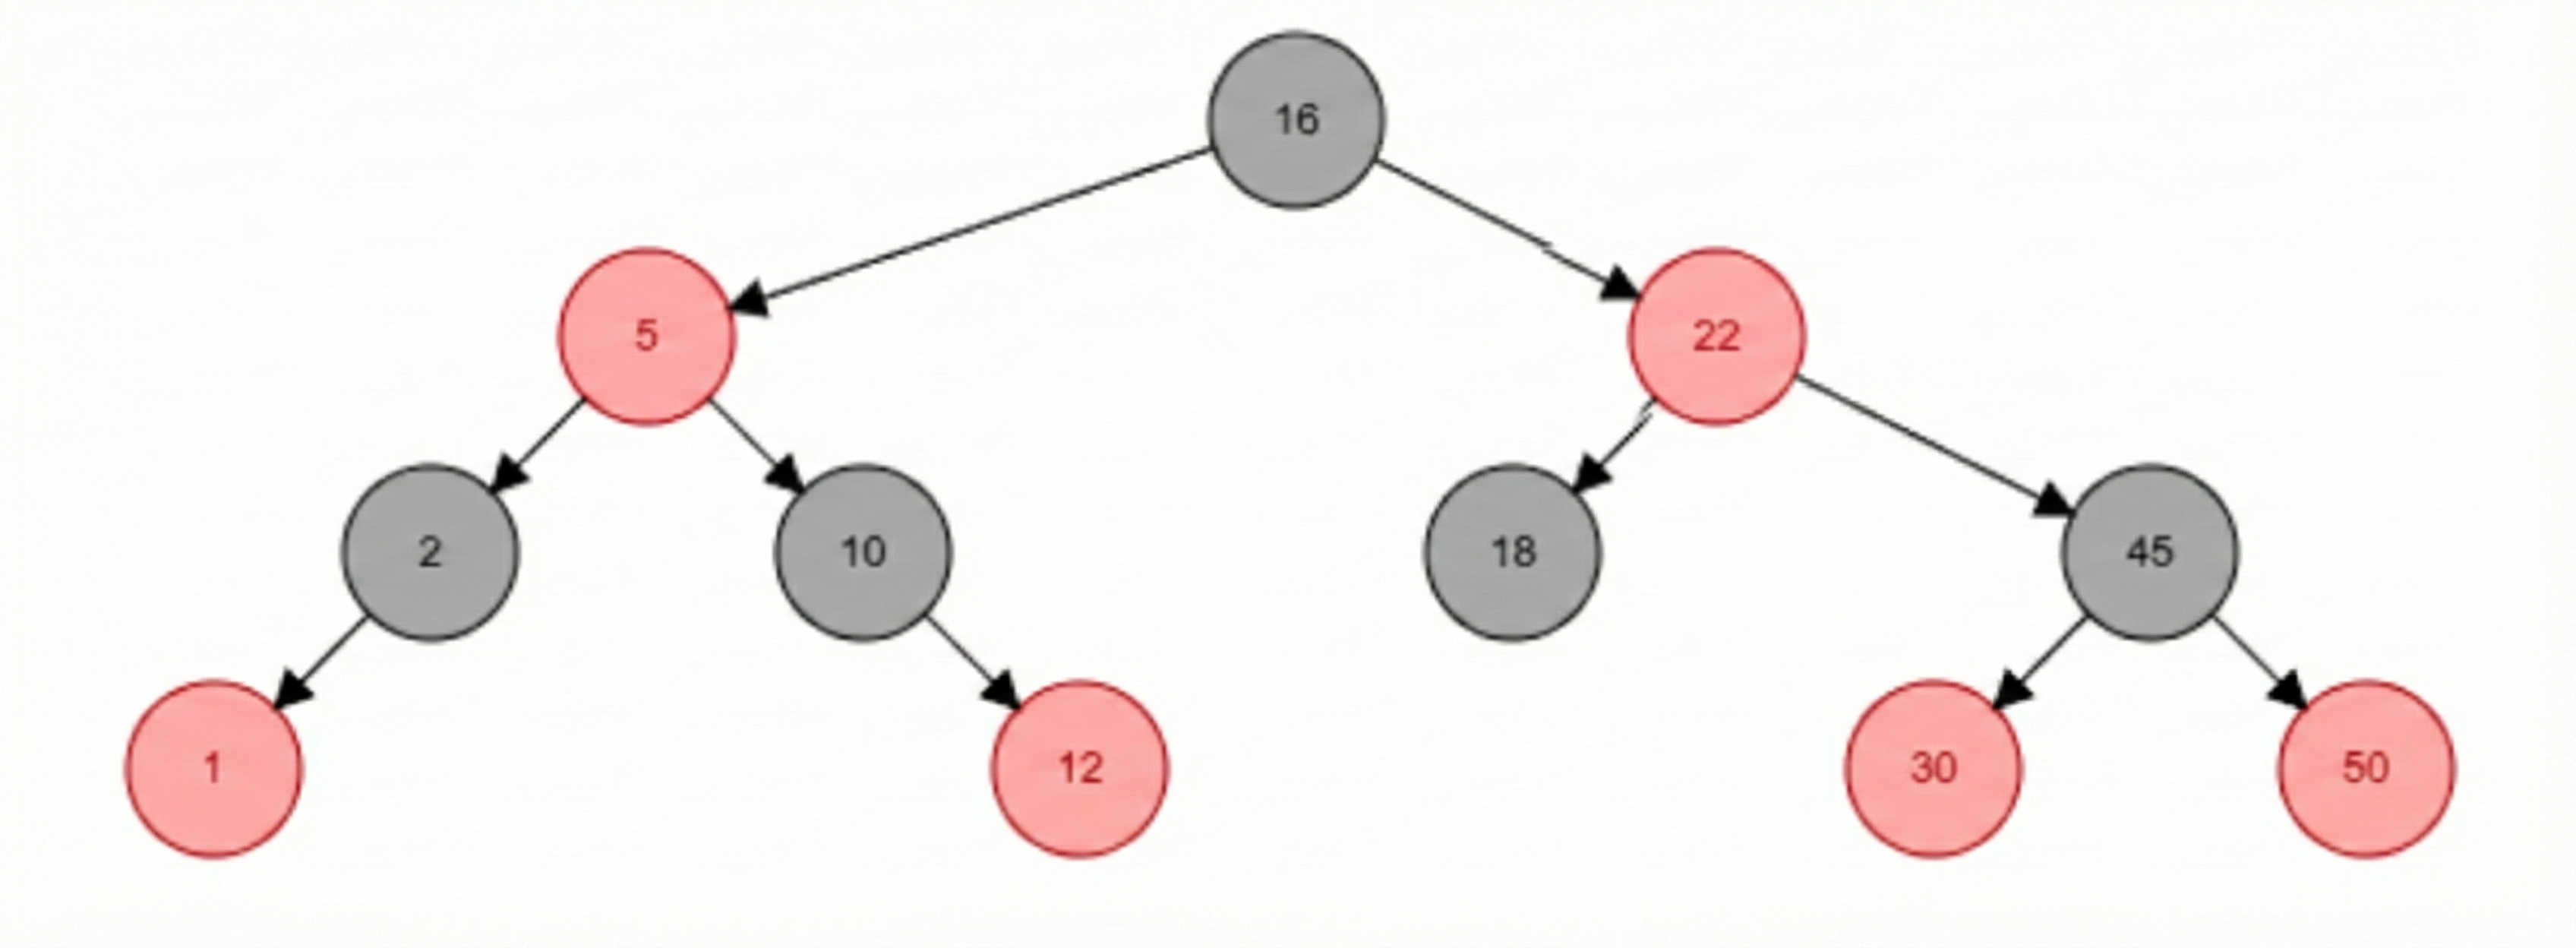